# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [69]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

from ydata_profiling import ProfileReport
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [70]:
file = 'data/data.csv'
df = pd.read_csv(file)
df.head()

LotArea   LotArea_M Street BldgType  OverallQual  OverallCond  YearBuilt  \
0     8450   785.03035   Pave     1Fam            7            5       2003   
1     9600   891.86880   Pave     1Fam            6            8       1976   
2    11250  1045.15875   Pave     1Fam            7            5       2001   
3     9550   887.22365   Pave     1Fam            7            5       1915   
4    14260  1324.79678   Pave     1Fam            8            5       2000   

   YearRemodAdd RoofStyle ExterQual  ... CentralAir GrLivArea  GrLivArea_M  \
0          2003     Gable        Gd  ...          Y      1710   158.864130   
1          1976     Gable        TA  ...          Y      1262   117.243586   
2          2002     Gable        Gd  ...          Y      1786   165.924758   
3          1970     Gable        TA  ...          Y      1717   159.514451   
4          2000     Gable        Gd  ...          Y      2198   204.200794   

   Bath KitchenQual GarageArea GarageArea_M  DateSold  SaleCondition  \
0     3          Gd        548    50.910844    2/2008         Normal   
1     2          TA        460    42.735380    5/2007         Normal   
2     3          Gd        608    56.485024    9/2008         Normal   
3     1          Gd        642    59.643726    2/2006        Abnorml   
4     3          Gd        836    77.666908   12/2008         Normal   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 26 columns]

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotArea_M      1460 non-null   float64
 2   Street         1460 non-null   object 
 3   BldgType       1460 non-null   object 
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   RoofStyle      1460 non-null   object 
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  TotalBsmtSF    1460 non-null   int64  
 13  TotalBsmtSF_M  1460 non-null   float64
 14  Heating        1460 non-null   object 
 15  HeatingQC      1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  GrLivArea      1460 non-null   int64  
 18  GrLivAre

# Задание 3 

Проведите разведочный анализ:

## 1. Выведите описательные статистики для числовых признаков.

In [72]:
df_data_prep = df.copy()

In [73]:
numerical_features = df_data_prep.select_dtypes(include=['float64', 'int64'])
numerical_features.describe()


LotArea     LotArea_M  OverallQual  OverallCond    YearBuilt  \
count    1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082    977.044879     6.099315     5.575342  1971.267808   
std      9981.264932    927.289456     1.382997     1.112799    30.202904   
min      1300.000000    120.773900     1.000000     1.000000  1872.000000   
25%      7553.500000    701.742811     5.000000     5.000000  1954.000000   
50%      9478.500000    880.581085     6.000000     5.000000  1973.000000   
75%     11601.500000   1077.814155     7.000000     6.000000  2000.000000   
max    215245.000000  19996.906235    10.000000     9.000000  2010.000000   

       YearRemodAdd  TotalBsmtSF  TotalBsmtSF_M    GrLivArea  GrLivArea_M  \
count   1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    1984.865753  1057.429452      98.238368  1515.463699   140.791124   
std       20.645407   438.705324      40.757041   525.480383    48.818704   
min     1950.000000     0.000000       0.000000   334.000000    31.029602   
25%     1967.000000   795.750000      73.927562  1129.500000   104.933938   
50%     1994.000000   991.500000      92.113325  1464.000000   136.009992   
75%     2004.000000  1298.250000     120.611320  1776.750000   165.065405   
max     2010.000000  6110.000000     567.637330  5642.000000   524.158726   

              Bath   GarageArea  GarageArea_M      SalePrice  
count  1460.000000  1460.000000   1460.000000    1460.000000  
mean      1.947945   472.980137     43.941274  180921.195890  
std       0.794965   213.804841     19.863111   79442.502883  
min       0.000000     0.000000      0.000000   34900.000000  
25%       1.000000   334.500000     31.076054  129975.000000  
50%       2.000000   480.000000     44.593440  163000.000000  
75%       3.000000   576.000000     53.512128  214000.000000  
max       4.000000  1418.000000    131.736454  755000.000000

## 2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

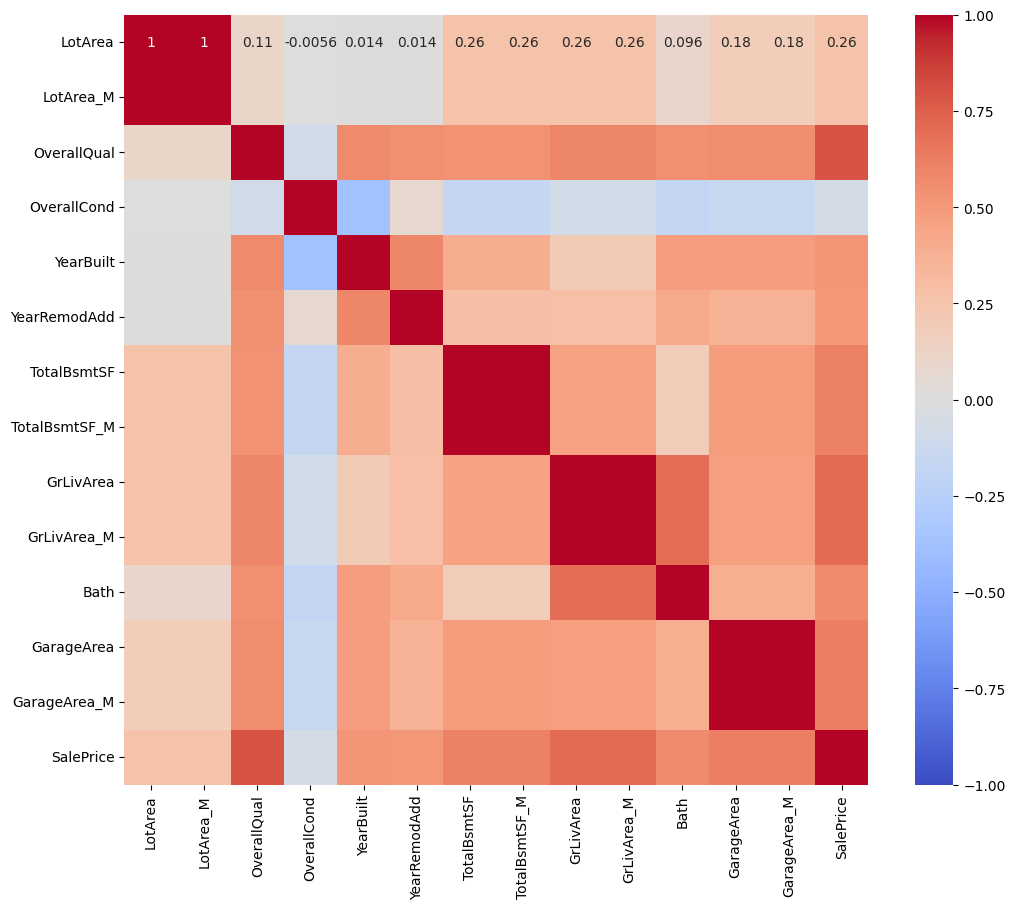

In [74]:
# Матрица корреляций для числовых признаков
corr_matrix = numerical_features.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


In [75]:
corr_matrix

LotArea  LotArea_M  OverallQual  OverallCond  YearBuilt  \
LotArea        1.000000   1.000000     0.105806    -0.005636   0.014228   
LotArea_M      1.000000   1.000000     0.105806    -0.005636   0.014228   
OverallQual    0.105806   0.105806     1.000000    -0.091932   0.572323   
OverallCond   -0.005636  -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt      0.014228   0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd   0.013788   0.013788     0.550684     0.073741   0.592855   
TotalBsmtSF    0.260833   0.260833     0.537808    -0.171098   0.391452   
TotalBsmtSF_M  0.260833   0.260833     0.537808    -0.171098   0.391452   
GrLivArea      0.263116   0.263116     0.593007    -0.079686   0.199010   
GrLivArea_M    0.263116   0.263116     0.593007    -0.079686   0.199010   
Bath           0.096360   0.096360     0.554555    -0.172989   0.478016   
GarageArea     0.180403   0.180403     0.562022    -0.151521   0.478954   
GarageArea_M   0.180403   0.180403     0.562022    -0.151521   0.478954   
SalePrice      0.263843   0.263843     0.790982    -0.077856   0.522897   

               YearRemodAdd  TotalBsmtSF  TotalBsmtSF_M  GrLivArea  \
LotArea            0.013788     0.260833       0.260833   0.263116   
LotArea_M          0.013788     0.260833       0.260833   0.263116   
OverallQual        0.550684     0.537808       0.537808   0.593007   
OverallCond        0.073741    -0.171098      -0.171098  -0.079686   
YearBuilt          0.592855     0.391452       0.391452   0.199010   
YearRemodAdd       1.000000     0.291066       0.291066   0.287389   
TotalBsmtSF        0.291066     1.000000       1.000000   0.454868   
TotalBsmtSF_M      0.291066     1.000000       1.000000   0.454868   
GrLivArea          0.287389     0.454868       0.454868   1.000000   
GrLivArea_M        0.287389     0.454868       0.454868   1.000000   
Bath               0.420235     0.193469       0.193469   0.699614   
GarageArea         0.371600     0.486665       0.486665   0.468997   
GarageArea_M       0.371600     0.486665       0.486665   0.468997   
SalePrice          0.507101     0.613581       0.613581   0.708624   

               GrLivArea_M      Bath  GarageArea  GarageArea_M  SalePrice  
LotArea           0.263116  0.096360    0.180403      0.180403   0.263843  
LotArea_M         0.263116  0.096360    0.180403      0.180403   0.263843  
OverallQual       0.593007  0.554555    0.562022      0.562022   0.790982  
OverallCond      -0.079686 -0.172989   -0.151521     -0.151521  -0.077856  
YearBuilt         0.199010  0.478016    0.478954      0.478954   0.522897  
YearRemodAdd      0.287389  0.420235    0.371600      0.371600   0.507101  
TotalBsmtSF       0.454868  0.193469    0.486665      0.486665   0.613581  
TotalBsmtSF_M     0.454868  0.193469    0.486665      0.486665   0.613581  
GrLivArea         1.000000  0.699614    0.468997      0.468997   0.708624  
GrLivArea_M       1.000000  0.699614    0.468997      0.468997   0.708624  
Bath              0.699614  1.000000    0.384582      0.384582   0.568267  
GarageArea        0.468997  0.384582    1.000000      1.000000   0.623431  
GarageArea_M      0.468997  0.384582    1.000000      1.000000   0.623431  
SalePrice         0.708624  0.568267    0.623431      0.623431   1.000000

In [76]:
# Удаляем признаки с высокой корреляцией (например, выше 0.9)
threshold = 0.9
high_corr = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns 
             if abs(corr_matrix.loc[col1, col2]) > threshold and col1 != col2]
# Пары признаков с высокой корреляцией
high_corr

[('LotArea', 'LotArea_M'),
 ('LotArea_M', 'LotArea'),
 ('TotalBsmtSF', 'TotalBsmtSF_M'),
 ('TotalBsmtSF_M', 'TotalBsmtSF'),
 ('GrLivArea', 'GrLivArea_M'),
 ('GrLivArea_M', 'GrLivArea'),
 ('GarageArea', 'GarageArea_M'),
 ('GarageArea_M', 'GarageArea')]

In [77]:
# Удаляем один элемент из пары зависимых признаков, например, футы:
columns_to_drop = set(feat for pair in high_corr for feat in pair if not feat.endswith('_M'))
print(columns_to_drop)
df_data_prep = df_data_prep.drop(columns=columns_to_drop)
df_data_prep.columns

{'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'LotArea'}


Index(['LotArea_M', 'Street', 'BldgType', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterQual', 'ExterCond',
       'Foundation', 'TotalBsmtSF_M', 'Heating', 'HeatingQC', 'CentralAir',
       'GrLivArea_M', 'Bath', 'KitchenQual', 'GarageArea_M', 'DateSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

## 3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

А всё начиналось с банального кода:

In [78]:
# target = 'SalePrice'
# cols = [i for i in df_data_prep.drop(columns=target).columns if df_data_prep[i].dtype in ['float64', 'int64']]
# for col in cols:
#     sns.scatterplot(x=target, y=col, data=df_data_prep)
#     plt.show() 

Но мы лёгких путей не ищем:

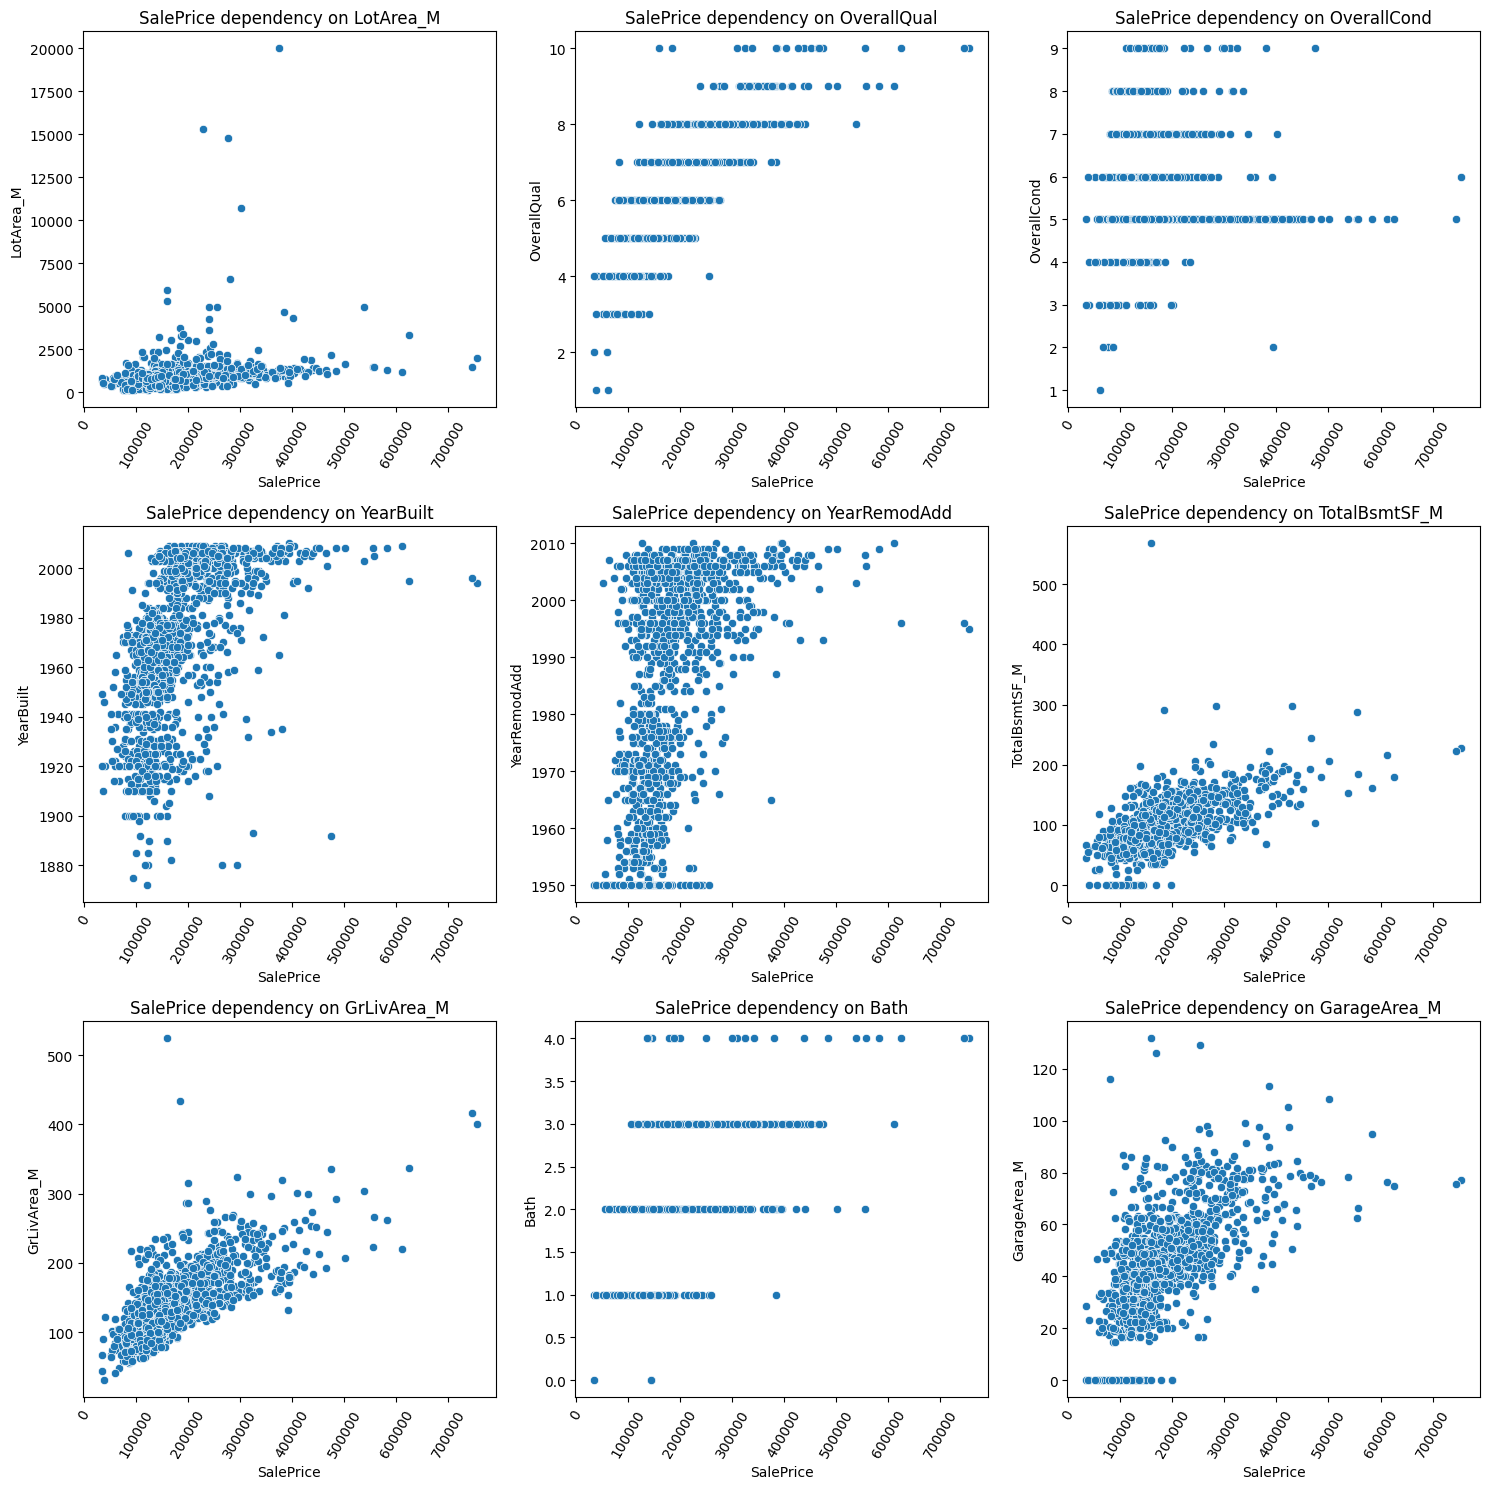

In [79]:

target = 'SalePrice'
cols = [i for i in df_data_prep.drop(columns=target).columns if df_data_prep[i].dtype in ['float64', 'int64']]

# # === ПРОСТОЕ ПОСТРОЕНИЕ ГРАФИКОВ: ===
# for i, col in enumerate(cols):
#     plot_name = f'{col} feature dependency on {target} target'
#     sns.scatterplot(x=target, y=col, data=df, ax=axes[i])
#     axes[i].set_title(plot_name)


# === СЛОЖНОЕ ПОСТРОЕНИЕ ГРАФИКОВ: ===
# Определим количество строк и столбцов
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)

# Создадим сетку графиков
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

# Построим графики
for i, col in enumerate(cols):
    row = i // n_cols
    col_idx = i % n_cols
    plot_name = f'{target} dependency on {col}'
    sns.scatterplot(x=target, y=col, data=df_data_prep, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(plot_name)
    axes[row, col_idx].tick_params(axis='x', rotation=60)  # Поворот меток оси x

# Отключим пустые оси, если есть
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


Как бы там ни было, но Profile Report круче.

In [80]:
profile = ProfileReport(df_data_prep, title="Houses Sales Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 4. Сделайте предварительные выводы.

1. Признаки, такие как `GrLivArea`, `TotalBsmtSF` и `GarageArea`, имеют сильную положительную корреляцию с ценой дома.
2. Все остальные признаки меньше влияют на целевую переменную по сравнению с жилой площадью дома или площадью подвала.
3. Признаки с высокой корреляцией между собой, такие как площади в квадратных футах и метрах, можно сократить, что мы и проделали, удалив значения в квадратных футах, и оставив православные квадратные метры. :)
4. Кроме того, возможно, потребуется удалить или как-то иначе обработать выбросы в цене и разнообразных площадях.

## 5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [81]:
df_feat_eng = df_data_prep.copy()
df_feat_eng.columns

Index(['LotArea_M', 'Street', 'BldgType', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterQual', 'ExterCond',
       'Foundation', 'TotalBsmtSF_M', 'Heating', 'HeatingQC', 'CentralAir',
       'GrLivArea_M', 'Bath', 'KitchenQual', 'GarageArea_M', 'DateSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

Мною в ультимативном порядке было принято решение создать 7 новых фичей:
- `YearsSinceRemodel` — количество лет с момента последнего ремонта;
- `SoldSeason` — в какую пору года дом был выставлен на продажу;
- `IsOldHouse` — является дом очень старым (до 1950 г.), старым (от 1950 до 1980) и новым (моложе 1980);
- `LogGrLivArea` — прологарифмировать площадь дома, чтобы исключить выбросы;
- `LogGarageArea` — прологарифмировать площадь гаража, чтобы исключить выбросы;
- `LogBsmntArea` — прологарифмировать площадь гаража, чтобы исключить выбросы.

Возможно, последние три будет выгоднее преобразовать в категории малый-средний-большой. Посмотрим-посмотрим.

Ну что. Посмотрели. C логарифмами фигня получилась, пришлось их убить. Такая же участь поджидала `IsOldHouse`. Результаты осмотра см. в файле results.log

In [122]:
# Вернулся, чтобы удалить выбросы:
df_feat_eng = df_feat_eng[~(
    (df_feat_eng['LotArea_M'] > 7500) |
    (df_feat_eng['TotalBsmtSF_M'] > 280) |
    (df_feat_eng['GrLivArea_M'] > 350) |
    (df_feat_eng['GarageArea_M'] > 100) |
    (df_feat_eng['SalePrice'] > 350000)
)]
df_feat_eng.shape

(1337, 22)

In [123]:
def years_since_remodel(df_feat_eng):
    df_ = df_feat_eng.copy()
    df_['YearsSinceRemodel'] = df_.apply(
        lambda x: int(x['DateSold'].split('/')[1]) - x['YearRemodAdd'], 
        axis=1
    )
    return df_.drop(columns=['YearRemodAdd'])


# def is_old_house(df_feat_eng):
#     df_ = df_feat_eng.copy()
#     df_['IsOldHouse'] = df_['YearBuilt'].apply(
#         lambda x: "very old" if x < 1950 else ("old" if x < 1980 else "new")
#     )
#     return df_.drop(columns=['YearBuilt'])


def season_sold(df_feat_eng):
    df_ = df_feat_eng.copy()
    df_['MonthSold'] = df_.apply(lambda x: int(x['DateSold'].split('/')[0]), axis=1)
    # df_['SeasonSold'] = df_['MonthSold'].apply(
    #     lambda x: 'winter' if x == 12 or x == 1 or x == 2
    #     else ('spring' if x < 6 else ('summer' if x < 9 else 'autumn'))
    # )    
    # return df_.drop(columns=['MonthSold', 'DateSold'])
    return df_.drop(columns=['DateSold'])


# def log_lot_area(df_feat_eng):
#     df_ = df_feat_eng.copy()
#     df_['LogLotArea'] = df_['LotArea_M'].apply(lambda x: np.log(x) if x > 0 else 0)
#     return df_.drop(columns=['LotArea_M'])


# def log_liv_area(df_feat_eng):
#     df_ = df_feat_eng.copy()
#     df_['LogGrLivArea'] = df_['GrLivArea_M'].apply(lambda x: np.log(x) if x > 0 else 0)
#     return df_.drop(columns=['GrLivArea_M'])


# def log_garage_area(df_feat_eng):
#     df_ = df_feat_eng.copy()
#     df_['LogGarageArea'] = df_['GarageArea_M'].apply(lambda x: np.log(x) if x > 0 else 0)
#     return df_.drop(columns=['GarageArea_M'])


# def log_basement_area(df_feat_eng):
#     df_ = df_feat_eng.copy()
#     df_['LogBsmntArea'] = df_['TotalBsmtSF_M'].apply(lambda x: np.log(x) if x > 0 else 0)
#     return df_.drop(columns=['TotalBsmtSF_M'])



# Задание 4 

Подготовьте данные:

### 1. Разделите данные на тренировочную и тестовую выборки.

In [124]:
y = df_feat_eng['SalePrice']
X = df_feat_eng.drop(columns=['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=137)


2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [125]:
### Ваш код здесь ###

3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [126]:
### Ваш код здесь ###

## Вышеприведённый порядок мне не нравится. Давайте лучше воткнём все эти процедуры в пайплайн, как серьёзные пацаны.

In [127]:
numeric_features = make_column_selector(dtype_include=["int64", "float64", "Int32"])
categorical_features = make_column_selector(dtype_include=["object"])

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

feature_engineering = Pipeline(steps=[
    ("years_since_remodel", FunctionTransformer(years_since_remodel)),
    # ("is_old_house", FunctionTransformer(is_old_house)),
    ("season_sold", FunctionTransformer(season_sold)),
    # ("log_liv_area", FunctionTransformer(log_liv_area)),
    # ("log_lot_area", FunctionTransformer(log_lot_area)),
    # ("log_garage_area", FunctionTransformer(log_garage_area)),
    # ("log_basement_area", FunctionTransformer(log_basement_area)),
])

col_transformer = ColumnTransformer(transformers=[
    ("numeric", numeric_transformer, numeric_features),
    ("categorical", categorical_transformer, categorical_features)
])

pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering),
    ("col_transformer", col_transformer),
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [128]:
params = [X_train, X_test, y_train, y_test]

In [129]:
def get_model_values(model, *params):
    
    def data_printing_and_logging(model, *values):
        with open('results.txt','a', encoding='utf-8') as file:
            model_name = type(model).__name__
            if model_name == "LinearRegression":
                reason = input('Please, enter the reason for change:')
                time = str(datetime.datetime.now())
                delimiter = f"\n{'=' *30}\n"
                file.write(f'{delimiter}{time}\nReason for the change: {reason}{delimiter}')
            file.write(f'\nModel name:\t{model_name}')
            string = f'''
Training MSE: {mse_train:15},\tTest MSE: {mse_test}
Training MAE: {mae_train:15},\tTest MAE: {mae_test}
Training R^2: {r2_train:15},\tTest R^2: {r2_test}\n'''
            file.write(string)
            print(string)

    # Предсказания
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Оцениваем качество модели
    mse_train = round(mean_squared_error(y_train, y_train_pred), 2)
    mse_test = round(mean_squared_error(y_test, y_test_pred), 2)

    mae_train = round(mean_absolute_error(y_train, y_train_pred), 2)
    mae_test = round(mean_absolute_error(y_test, y_test_pred), 2)

    r2_train = round(r2_score(y_train, y_train_pred), 2)
    r2_test = round(r2_score(y_test, y_test_pred), 2)

    values = [mse_train, mse_test, mae_train, mae_test, r2_train, r2_test]

    data_printing_and_logging(model, values)


def get_model_coeffs(model, pipeline):
    numeric_transformer = pipeline.named_steps['col_transformer'].named_transformers_['numeric']
    categorical_transformer = pipeline.named_steps['col_transformer'].named_transformers_['categorical']
    numeric_feature_names = numeric_transformer.get_feature_names_out()
    categorical_feature_names = categorical_transformer.get_feature_names_out()
    all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

    mod_coeffs = model.coef_
    weights_dict_pos = {weight: value for weight, value in zip(all_feature_names, mod_coeffs) if value > 0}
    weights_dict_neg = {weight: value for weight, value in zip(all_feature_names, mod_coeffs) if value < 0}
    weights_dict_zero = {weight: value for weight, value in zip(all_feature_names, mod_coeffs) if value == 0}
    sorted_dict_pos = sorted(weights_dict_pos.items(), key=lambda x: x[1], reverse=True)
    sorted_dict_neg = sorted(weights_dict_neg.items(), key=lambda x: x[1])
    sorted_dict_zero = sorted(weights_dict_zero.items(), key=lambda x: x[0])

    return sorted_dict_pos, sorted_dict_neg, sorted_dict_zero



In [130]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

model_values = get_model_values(lin_reg, params)



Training MSE:    334287198.28,	Test MSE: 469293678.38
Training MAE:        13395.13,	Test MAE: 15561.04
Training R^2:            0.88,	Test R^2: 0.81



In [131]:
model_coeffs = get_model_coeffs(lin_reg, pipeline)
model_coeffs

([('RoofStyle_Shed', 32422.412861229146),
  ('Heating_Wall', 24552.152128101185),
  ('GrLivArea_M', 19125.241748693636),
  ('KitchenQual_Ex', 15400.433601698445),
  ('YearBuilt', 13262.550077228703),
  ('Heating_Floor', 11385.100225778351),
  ('ExterCond_Po', 11242.703867799719),
  ('OverallQual', 11122.59137780597),
  ('SaleCondition_AdjLand', 9886.940308079578),
  ('TotalBsmtSF_M', 9409.967049399795),
  ('BldgType_1Fam', 8731.151173632596),
  ('Street_Pave', 8488.185330145032),
  ('Foundation_Slab', 8384.975338906052),
  ('OverallCond', 8022.668384544593),
  ('Foundation_PConc', 7545.629515167065),
  ('HeatingQC_Fa', 6252.817562824938),
  ('LotArea_M', 5857.61523812867),
  ('GarageArea_M', 5222.3703281787675),
  ('BldgType_TwnhsE', 4447.877051864583),
  ('ExterQual_Ex', 4372.888009162103),
  ('ExterQual_Gd', 4075.468705788787),
  ('Foundation_CBlock', 3934.9561741292637),
  ('Foundation_BrkTil', 3839.1144658756934),
  ('BldgType_2fmCon', 3387.6299075156057),
  ('HeatingQC_Ex', 3013.9

2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [132]:
def get_best_alpha(model, X_train, y_train):
    params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 110, 120, 135, 150]}
    model_grid = GridSearchCV(model, param_grid=params, cv=5, scoring='neg_mean_absolute_error')
    model_grid.fit(X_train, y_train)
    best_alpha = model_grid.best_params_['alpha']
    return best_alpha


def print_alpha(model, best_alpha):
    print(f'\nThe best alpha for {type(model).__name__} is: {best_alpha}')

In [133]:
lasso = Lasso(random_state=137, max_iter=10000)

# Лучший параметр регуляризации
# best_alpha = get_best_alpha(lasso, X_train, y_train)
# print_alpha(lasso, best_alpha)

# Обучаем модель с найденным alpha
lasso_best = Lasso(alpha=150, random_state=137, max_iter=10000)
lasso_best.fit(X_train, y_train)

model_values = get_model_values(lasso_best, params)



Training MSE:    347881887.34,	Test MSE: 448766136.52
Training MAE:         13685.8,	Test MAE: 15343.06
Training R^2:            0.87,	Test R^2: 0.82



Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [134]:
model_coeffs = get_model_coeffs(lasso_best, pipeline)
model_coeffs

([('GrLivArea_M', 18839.38197259451),
  ('KitchenQual_Ex', 13969.474808954008),
  ('YearBuilt', 13612.355052109062),
  ('OverallQual', 11565.04445932458),
  ('TotalBsmtSF_M', 9012.652515285583),
  ('OverallCond', 7641.0324874854505),
  ('BldgType_1Fam', 6795.301102592054),
  ('LotArea_M', 6135.468143437125),
  ('GarageArea_M', 5427.779672322202),
  ('ExterQual_Gd', 4857.802438934574),
  ('Foundation_PConc', 3675.7895846612782),
  ('HeatingQC_Ex', 1284.1434378103554),
  ('BldgType_TwnhsE', 1014.1210542851023),
  ('MonthSold', 763.1769326094168),
  ('Bath', 608.0722472063044)],
 [('SaleCondition_Abnorml', -8484.617682960043),
  ('BldgType_Twnhs', -5596.547294541767),
  ('KitchenQual_TA', -4122.556944490087),
  ('BldgType_Duplex', -3081.232987826812),
  ('HeatingQC_TA', -1306.303251512718),
  ('ExterCond_Gd', -1121.07806571036),
  ('RoofStyle_Gable', -830.7447637659358),
  ('YearsSinceRemodel', -640.3628294727496),
  ('ExterQual_TA', -499.5683705492583),
  ('Foundation_CBlock', -100.65696

### LASSO зануляет бесполезные признаки, а те, которые использует, наоборот увеличивает в обе стороны. 

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [135]:
ridge = Ridge(random_state=137)

best_alpha = get_best_alpha(ridge, X_train, y_train)
print_alpha(ridge, best_alpha)

# Обучаем модель с найденным alpha
ridge_best = Ridge(alpha=best_alpha, random_state=137, max_iter=10000)
ridge_best.fit(X_train, y_train)

model_values = get_model_values(ridge_best, params)


The best alpha for Ridge is: 10

Training MSE:     340393843.6,	Test MSE: 443124182.38
Training MAE:        13584.51,	Test MAE: 15240.13
Training R^2:            0.88,	Test R^2: 0.82



In [136]:
# Коэффициенты модели
model_coeffs = get_model_coeffs(ridge_best, pipeline)
model_coeffs

([('GrLivArea_M', 18326.996525346505),
  ('YearBuilt', 12584.30417619786),
  ('KitchenQual_Ex', 12293.447516712939),
  ('OverallQual', 11069.386428373582),
  ('TotalBsmtSF_M', 9416.494838746301),
  ('BldgType_1Fam', 7780.98365486637),
  ('OverallCond', 7764.326208140552),
  ('LotArea_M', 6138.0334844963945),
  ('GarageArea_M', 5425.256833646439),
  ('Heating_Wall', 5419.588300328697),
  ('Foundation_Slab', 4449.206412280903),
  ('Foundation_PConc', 3691.406165225717),
  ('ExterQual_Gd', 3613.4793064023893),
  ('Street_Pave', 3564.1523541127735),
  ('BldgType_TwnhsE', 3473.875334584442),
  ('RoofStyle_Shed', 3357.872427572219),
  ('HeatingQC_Fa', 2864.7987733915843),
  ('SaleCondition_Partial', 2834.573358738935),
  ('SaleCondition_AdjLand', 2543.4556600829187),
  ('ExterQual_Ex', 2427.6984025637366),
  ('SaleCondition_Normal', 2398.668195718881),
  ('ExterCond_Fa', 1513.994046798702),
  ('Bath', 1420.0302756888589),
  ('RoofStyle_Flat', 1342.2486722442939),
  ('BldgType_2fmCon', 1150.3

Посмотрите на веса полученной модели. Какой вывод можно сделать?

### Конёк использует все веса. В сравнении с Лассо, у него все кэфы более равномерно "размазаны" по всем фичам.

## 4. Попробуем Elastic Net

In [137]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)

best_alpha = get_best_alpha(elastic_net, X_train, y_train)
print_alpha(elastic_net, best_alpha)
elastic_net_best = ElasticNet(alpha=best_alpha, max_iter=10000, random_state=137)
elastic_net_best.fit(X_train, y_train)

model_values = get_model_values(elastic_net_best, params)


The best alpha for ElasticNet is: 0.1

Training MSE:    352514749.83,	Test MSE: 449079422.36
Training MAE:        13817.24,	Test MAE: 15340.28
Training R^2:            0.87,	Test R^2: 0.82



In [138]:
# Коэффициенты модели
model_coeffs = get_model_coeffs(elastic_net_best, pipeline)
model_coeffs

([('GrLivArea_M', 16402.33246090744),
  ('OverallQual', 11481.3727211418),
  ('YearBuilt', 10547.528888415864),
  ('TotalBsmtSF_M', 9493.68936906926),
  ('OverallCond', 6963.527266188762),
  ('KitchenQual_Ex', 6497.0085010767225),
  ('LotArea_M', 6414.02287487472),
  ('GarageArea_M', 5918.700907469036),
  ('BldgType_1Fam', 5713.231086786729),
  ('ExterQual_Gd', 3252.802888601914),
  ('Foundation_PConc', 2990.573579155519),
  ('Bath', 2589.8276796554),
  ('SaleCondition_Normal', 2505.945050898331),
  ('SaleCondition_Partial', 1970.5049330981844),
  ('Foundation_Slab', 1628.3538940150074),
  ('BldgType_TwnhsE', 1555.8491205750825),
  ('HeatingQC_Ex', 1543.9000937950907),
  ('CentralAir_Y', 1407.389482280582),
  ('HeatingQC_Fa', 1287.3868869073242),
  ('Heating_Wall', 1264.1419671588253),
  ('Street_Pave', 1126.6143934385357),
  ('ExterQual_Ex', 1051.0872384978281),
  ('MonthSold', 980.1985429506611),
  ('ExterCond_TA', 906.1302578090608),
  ('RoofStyle_Shed', 722.8267970648129),
  ('Roof

## Как и ожидалось Elastic Net показал усредненный вариант между гребневой и лассо-регуляризацией.

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

In [139]:
model_coeffs[0][:3]

[('GrLivArea_M', 16402.33246090744),
 ('OverallQual', 11481.3727211418),
 ('YearBuilt', 10547.528888415864)]

## Да, можно.

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

In [140]:
model_coeffs[1][:3]

[('KitchenQual_TA', -4624.989464909444),
 ('SaleCondition_Abnorml', -4594.370260830794),
 ('BldgType_Twnhs', -4108.40829278197)]

## Если автор вопроса подразумевает наоборот уменьшение указанных значений, а не увеличение, то да — можно. Чем ниже значение этих коэффициентов, то тем ниже будет стоимость.

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

In [141]:
model_coeffs = get_model_coeffs(lasso_best, pipeline)
model_coeffs[2][:3]

[('BldgType_2fmCon', -0.0), ('CentralAir_N', -0.0), ('CentralAir_Y', 0.0)]

### Видимо, конкретно в данной выборке от этих фичей не зависел таргет. Однако, есть мнение, что они бы участвовали и имели бы вес, если выборку увеличить хотя бы на порядок.

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 